<a href="https://colab.research.google.com/github/georgeK23/SU1/blob/main/Final_Project_Corn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries if not already installed
# !pip install pandas scikit-learn matplotlib

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset (replace with your file path in Colab)
file_path = "/content/Corn.csv"  # Adjust if the file is in a different location
corn_data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(corn_data.head())

print("\nDataset Information:")
corn_data.info()

# Handle missing values (if any)
corn_data = corn_data.dropna()

# Convert 'Date' column to datetime format and set it as index
corn_data['Date'] = pd.to_datetime(corn_data['Date'])
corn_data.set_index('Date', inplace=True)

# Create a target variable: Shift 'Close' to predict the next day's closing price
corn_data['Target'] = corn_data['Close'].shift(-1)

# Drop rows with NaN in the target variable
corn_data.dropna(inplace=True)

# Features and target split
X = corn_data.drop(columns=['Target'])
y = corn_data['Target']

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dataset dimensions
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Dataset Overview:
         Date    Open    High     Low   Close  Adj Close   Volume
0  2000-07-17  182.25  182.25  178.25  179.25     179.25  19385.0
1  2000-07-18  179.00  183.25  179.00  180.75     180.75  25205.0
2  2000-07-19  180.00  182.75  178.75  182.00     182.00  17126.0
3  2000-07-20  181.50  187.00  181.00  186.00     186.00  18742.0
4  2000-07-21  185.50  188.00  185.00  187.75     187.75  16814.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323 entries, 0 to 5322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5323 non-null   object 
 1   Open       5190 non-null   float64
 2   High       5190 non-null   float64
 3   Low        5190 non-null   float64
 4   Close      5190 non-null   float64
 5   Adj Close  5190 non-null   float64
 6   Volume     5190 non-null   float64
dtypes: float64(6), object(1)
memory usage: 291.2+ KB

Training set size: 4151
Testing set size: 1

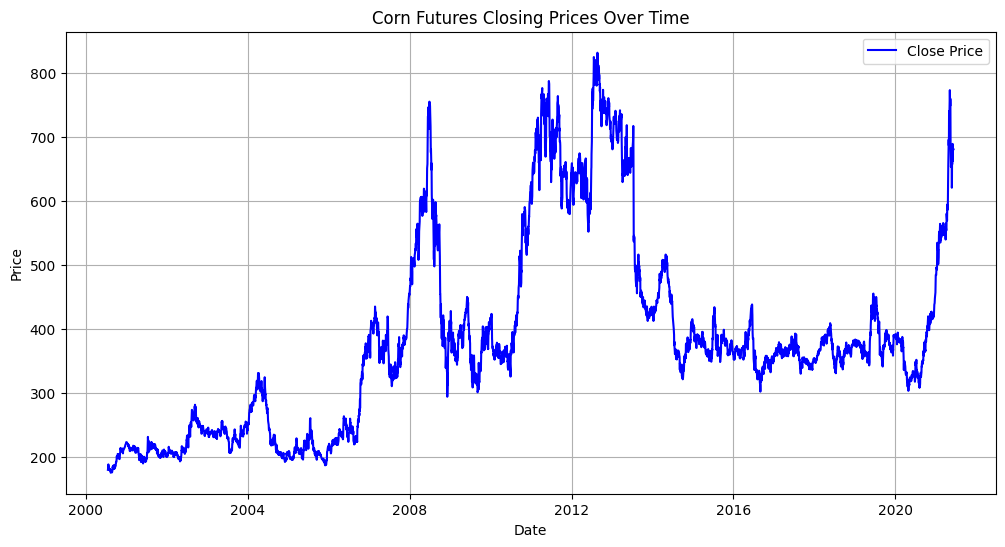

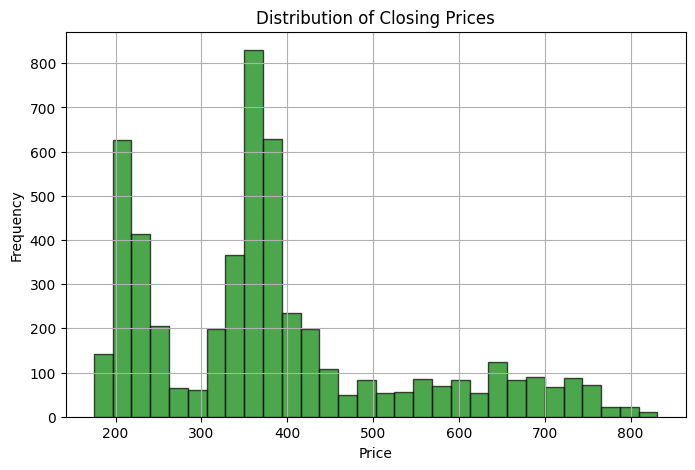

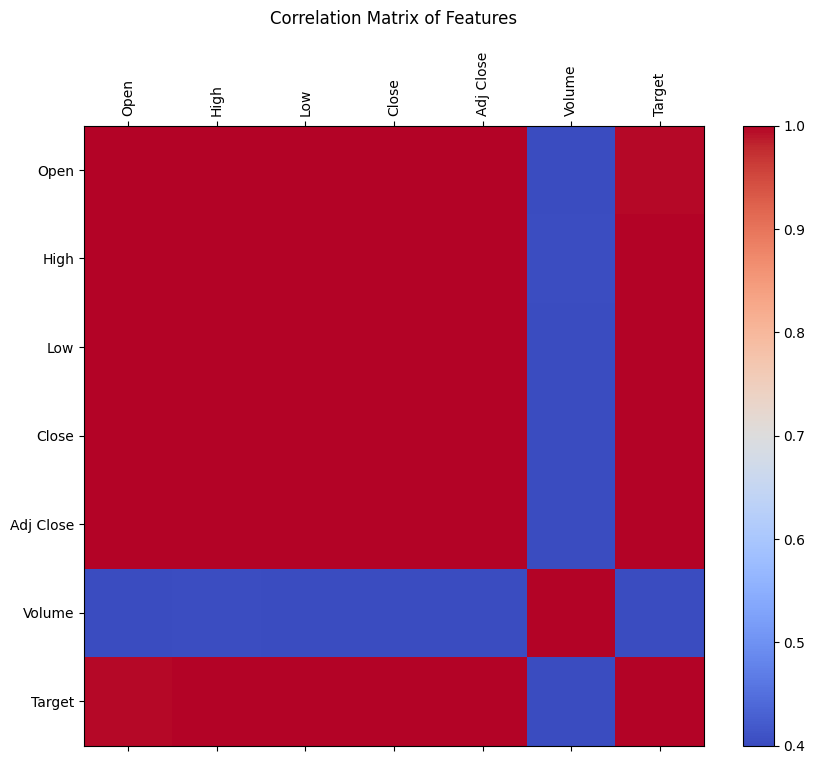


Top correlations with the Target (Next Day Close):
Target       1.000000
Close        0.998539
Adj Close    0.998539
Low          0.997945
High         0.997899
Open         0.997269
Volume       0.401514
Name: Target, dtype: float64


In [2]:
import matplotlib.pyplot as plt

# Visualize the historical closing prices
plt.figure(figsize=(12, 6))
plt.plot(corn_data.index, corn_data['Close'], label='Close Price', color='blue')
plt.title('Corn Futures Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Plot histogram of closing prices
plt.figure(figsize=(8, 5))
plt.hist(corn_data['Close'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Check correlation between features
correlation_matrix = corn_data.corr()

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.title('Correlation Matrix of Features', pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Display the top correlations with the target variable
print("\nTop correlations with the Target (Next Day Close):")
print(correlation_matrix['Target'].sort_values(ascending=False))


Mean Absolute Error (MAE): 5.52
Mean Squared Error (MSE): 68.21
Root Mean Squared Error (RMSE): 8.26


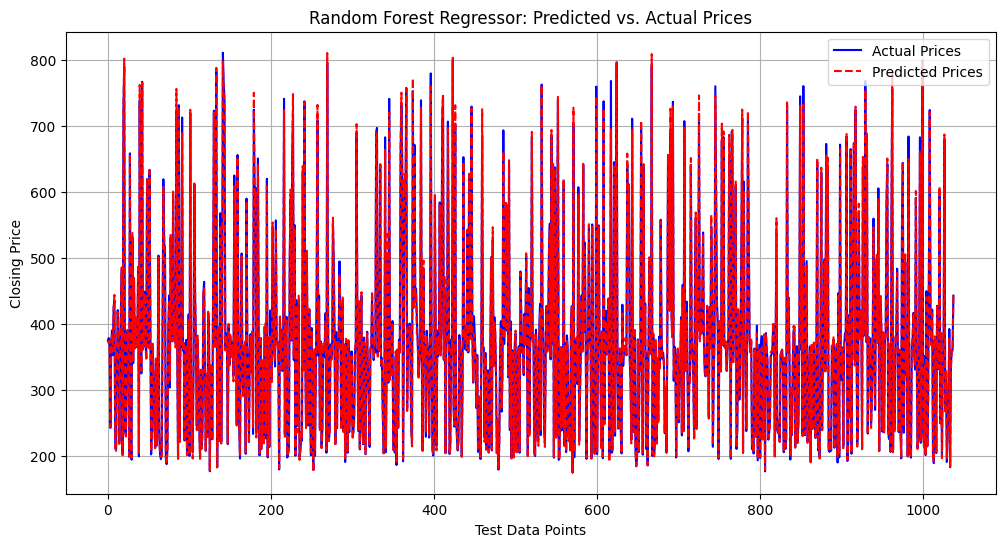

In [6]:
# Import the Random Forest Regressor and evaluation metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Instantiate and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 2: Make predictions
y_pred = rf_regressor.predict(X_test)

# Step 3: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Step 4: Visualization of Predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='dashed')
plt.title('Random Forest Regressor: Predicted vs. Actual Prices')
plt.xlabel('Test Data Points')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
129 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Cross-Validation MAE: 5.764341480582809


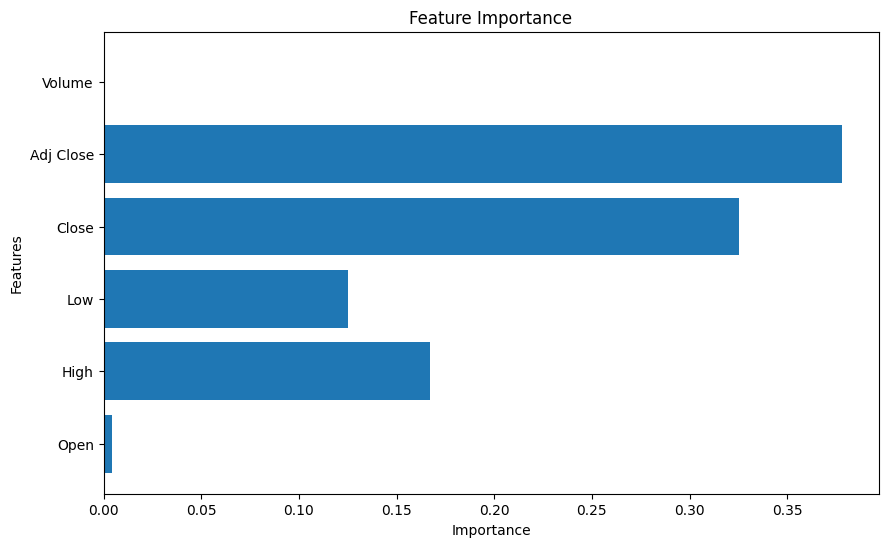

XGBoost MAE: 5.335888210289281


In [7]:
corn_data['Lag_1_Close'] = corn_data['Close'].shift(1)
corn_data['Lag_2_Close'] = corn_data['Close'].shift(2)
corn_data['7_day_avg'] = corn_data['Close'].rolling(window=7).mean()
corn_data['14_day_avg'] = corn_data['Close'].rolling(window=14).mean()
corn_data['Volume_Change'] = corn_data['Volume'] / corn_data['Volume'].rolling(window=7).mean()

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-Validation MAE:", -np.mean(scores))

importances = rf_regressor.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("XGBoost MAE:", mae_xgb)


Random Forest Mean Absolute Error (MAE): 5.38
Random Forest Mean Squared Error (MSE): 66.71
Random Forest Root Mean Squared Error (RMSE): 8.17


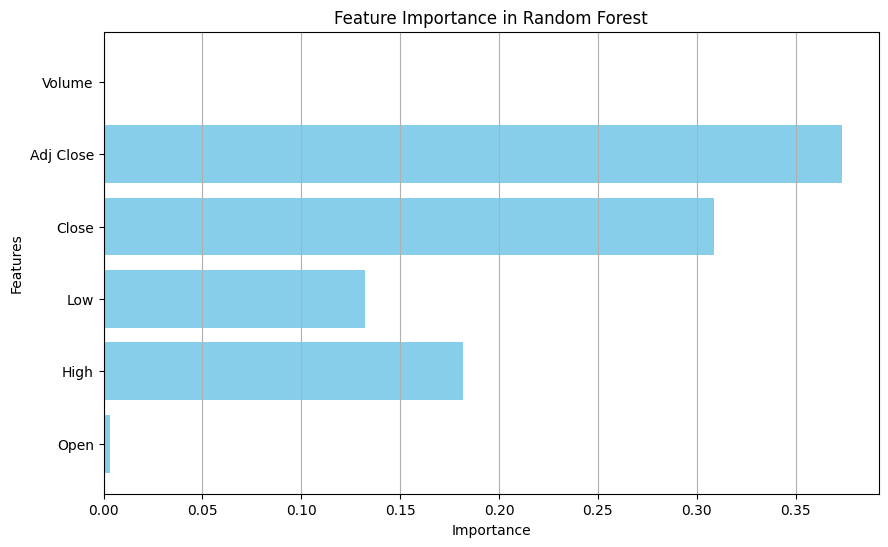

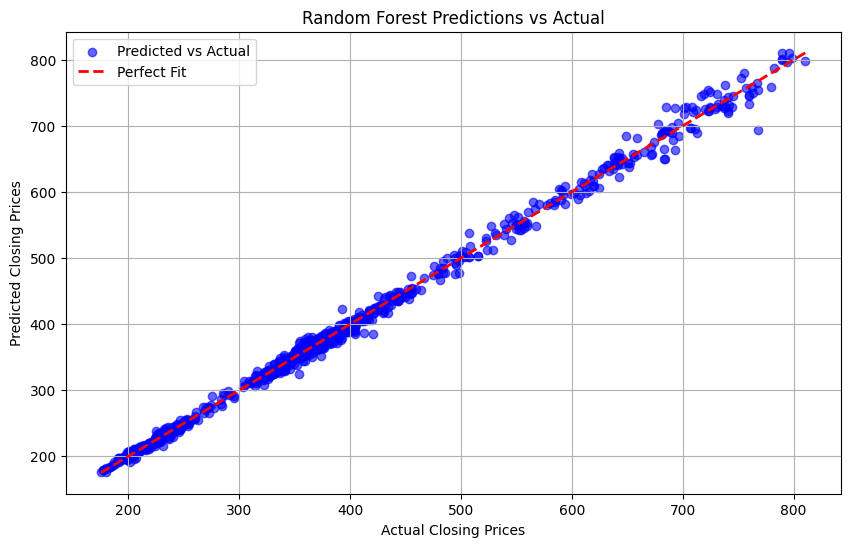

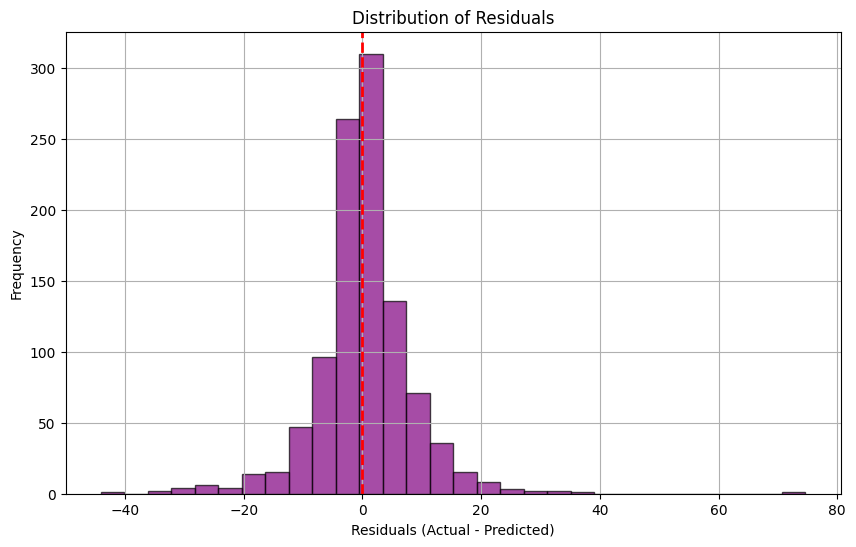

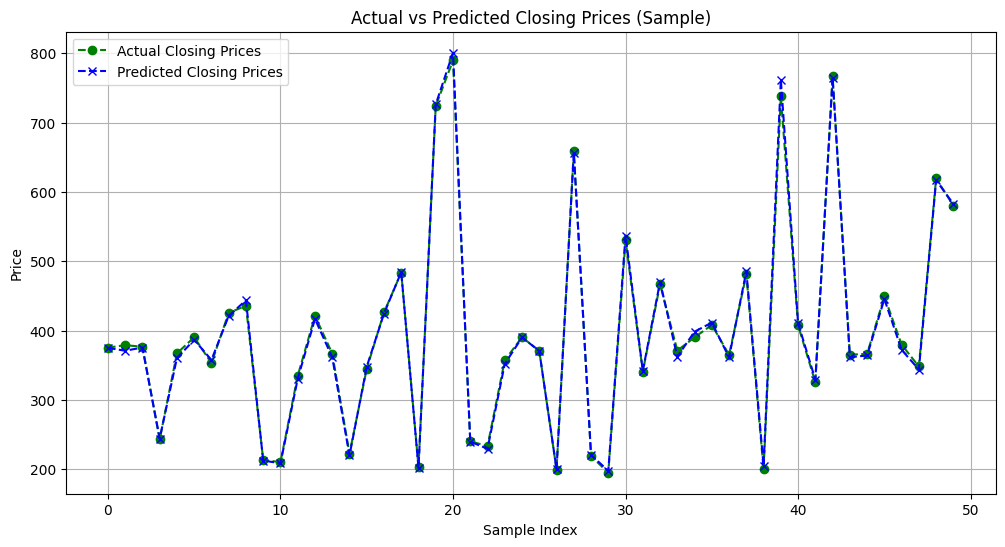

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf:.2f}")

# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.grid(axis="x")
plt.show()

# Scatter Plot: Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Fit")
plt.xlabel("Actual Closing Prices")
plt.ylabel("Predicted Closing Prices")
plt.title("Random Forest Predictions vs Actual")
plt.legend()
plt.grid()
plt.show()

# Residuals Visualization
residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color="purple", edgecolor="black", alpha=0.7)
plt.axvline(0, color="red", linestyle="--", linewidth=2)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Line Plot: Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label="Actual Closing Prices", color="green", marker="o", linestyle="dashed")
plt.plot(y_pred_rf[:50], label="Predicted Closing Prices", color="blue", marker="x", linestyle="dashed")
plt.title("Actual vs Predicted Closing Prices (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


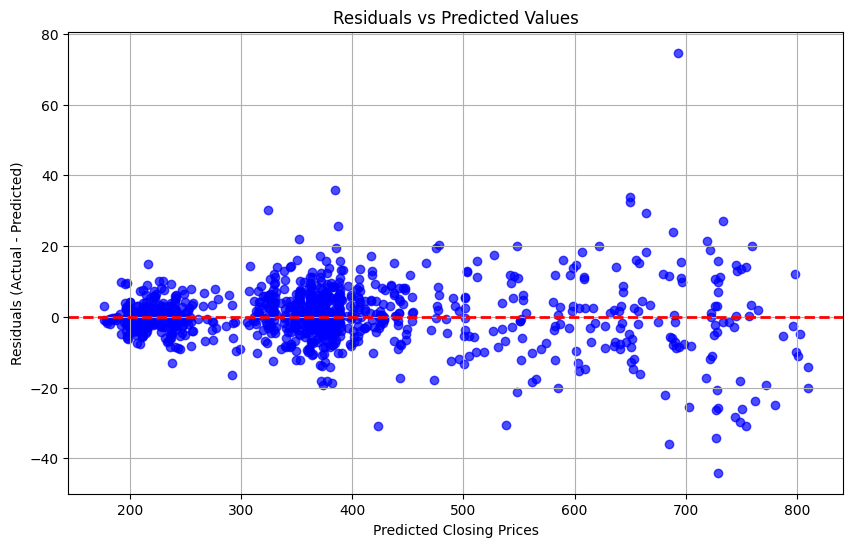

In [9]:
# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.7, color="blue")
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Closing Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid()
plt.show()


Random Forest MAE: 5.3894860327941565


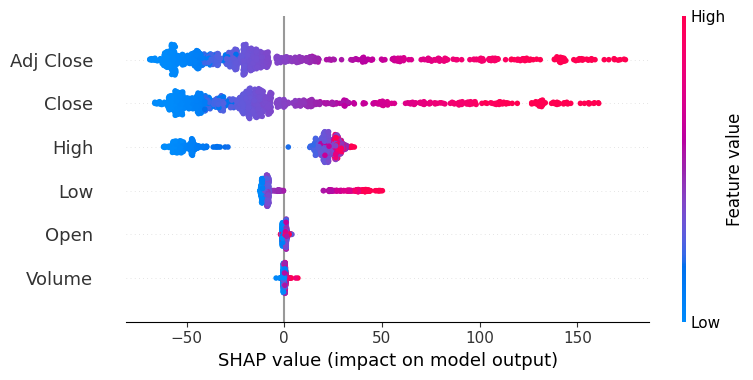

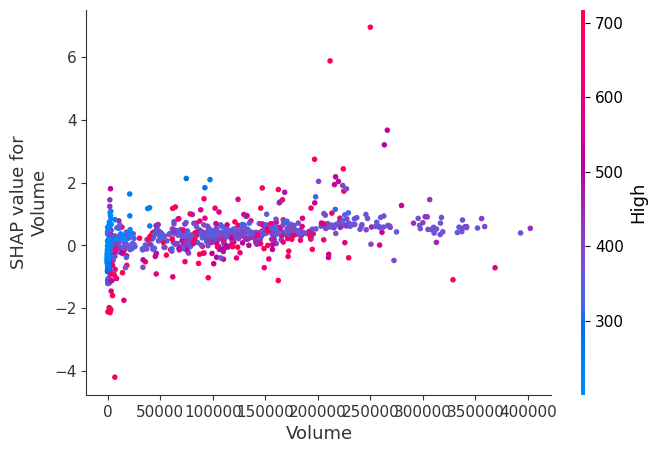

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import shap

# Step 1: Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Step 2: Evaluate model
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred))

# Step 3: Interpret the model using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summary plot of feature importances
shap.summary_plot(shap_values, X_test)

# Dependence plot for a specific feature
shap.dependence_plot('Volume', shap_values, X_test)


In [13]:
# Force plot for a single prediction
shap.initjs()
sample_index = 0  # Change this to analyze a specific sample
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index])


In [14]:
corn_data['Rolling_Mean'] = corn_data['Close'].rolling(window=5).mean()
corn_data['Rolling_Std'] = corn_data['Close'].rolling(window=5).std()


In [15]:
corn_data['Day_sin'] = np.sin(2 * np.pi * corn_data.index.day / 365)
corn_data['Day_cos'] = np.cos(2 * np.pi * corn_data.index.day / 365)


In [16]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, max_depth=10, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBoost MAE:", mean_absolute_error(y_test, xgb_pred))


XGBoost MAE: 6.045678478674622


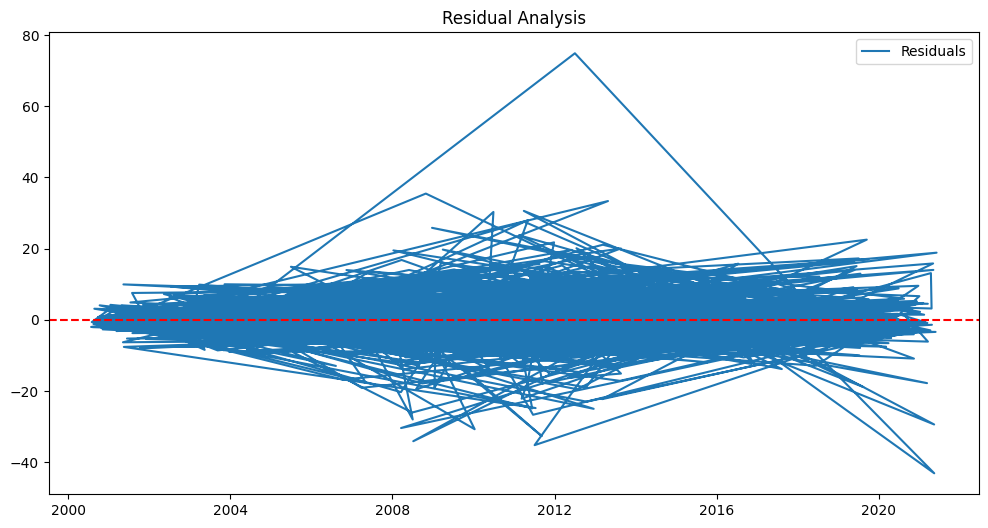

In [17]:
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.plot(residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Analysis")
plt.legend()
plt.show()


In [18]:
future_predictions = rf.predict(X_test.tail(30))  # Adjust feature set for prediction


In [19]:
from sklearn.ensemble import VotingRegressor
ensemble_model = VotingRegressor([('rf', rf), ('xgb', xgb)])
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
print("Ensemble Model MAE:", mean_absolute_error(y_test, ensemble_pred))


Ensemble Model MAE: 5.554316717189467


In [20]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

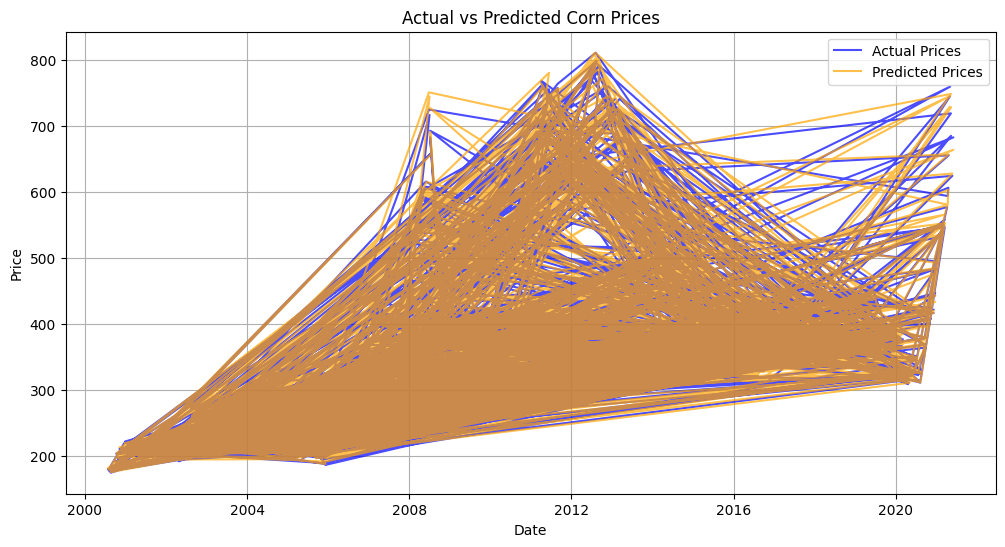

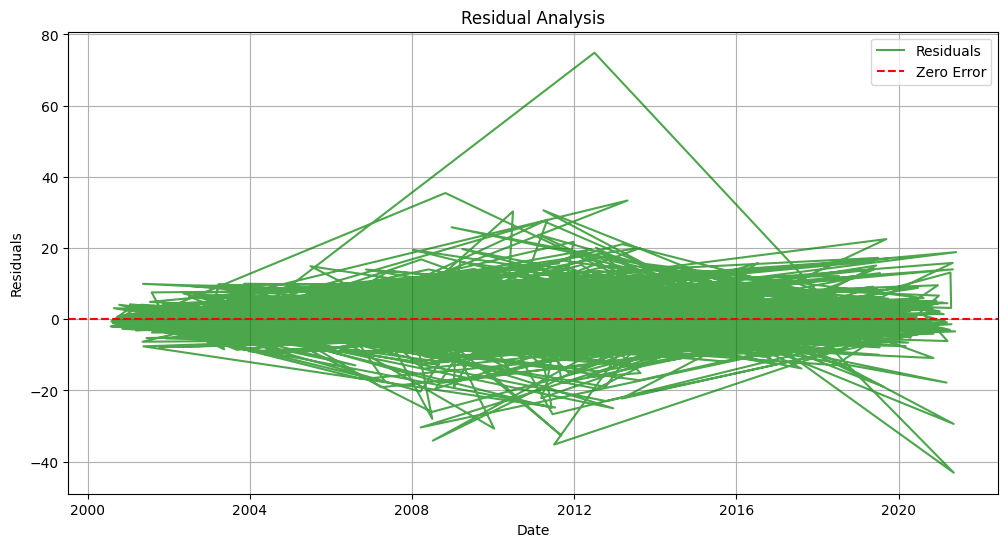

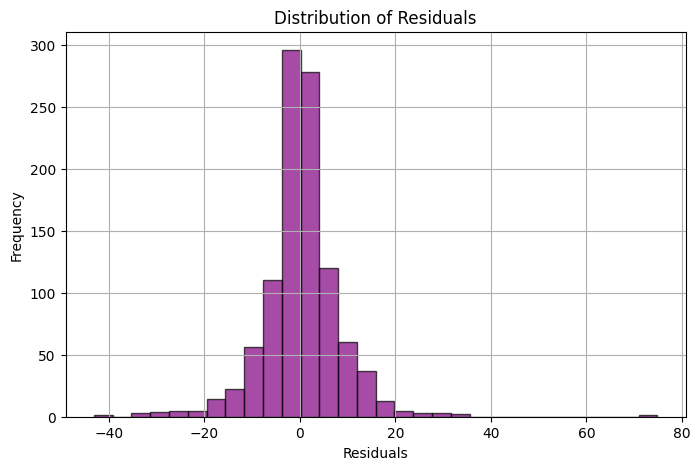

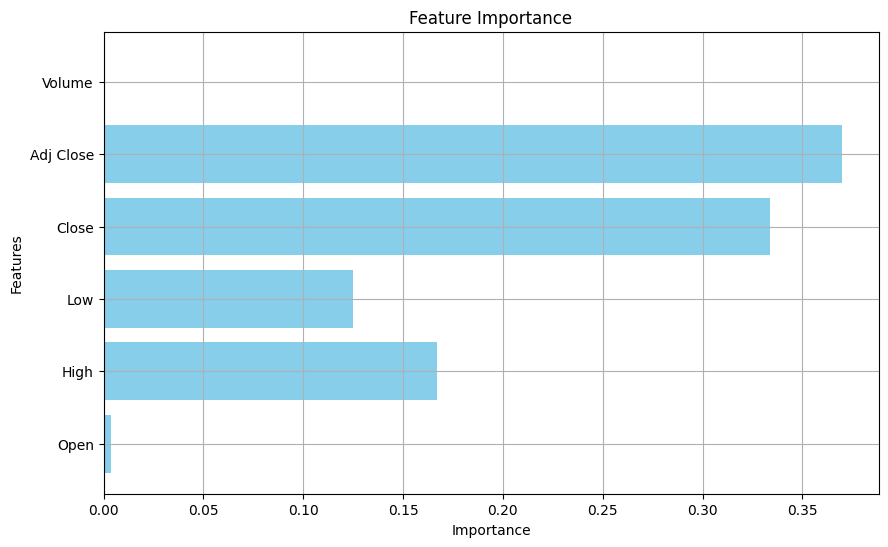

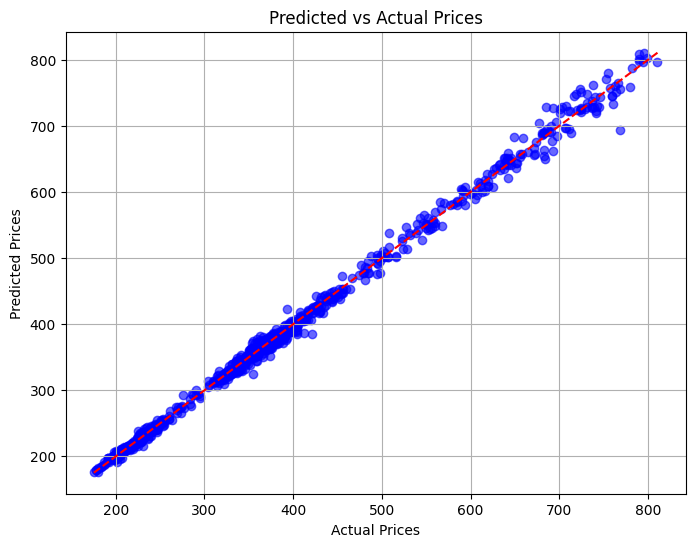

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred = rf.predict(X_test)

# 1. Plot Actual vs. Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color="blue", alpha=0.7)
plt.plot(y_test.index, y_pred, label="Predicted Prices", color="orange", alpha=0.7)
plt.title("Actual vs Predicted Corn Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# 2. Residual Analysis
residuals = y_test - y_pred

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, residuals, label="Residuals", color="green", alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label="Zero Error")
plt.title("Residual Analysis")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# 3. Feature Importance
feature_importances = rf.feature_importances_
features = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color="skyblue")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid()
plt.show()

# 4. Predicted vs. Actual Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.title("Predicted vs Actual Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.show()


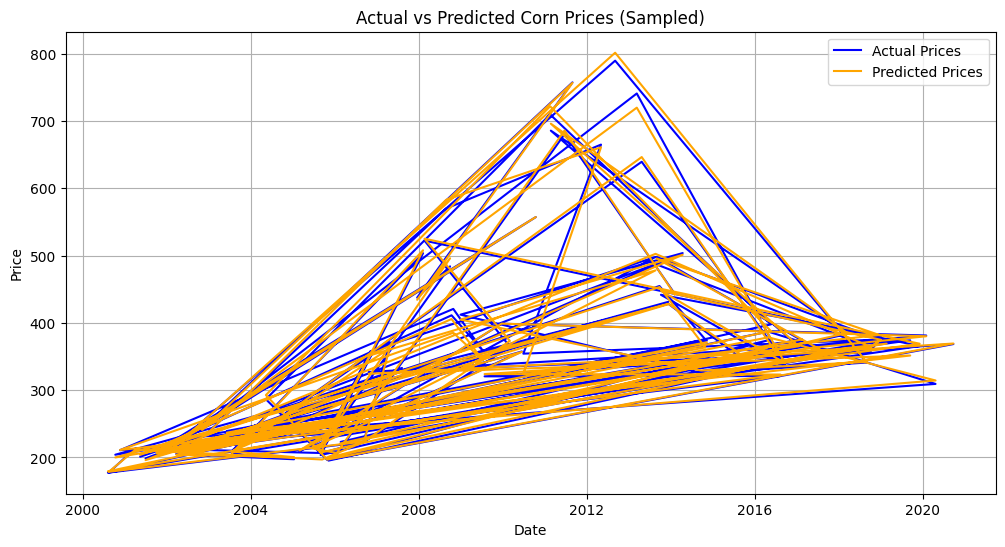

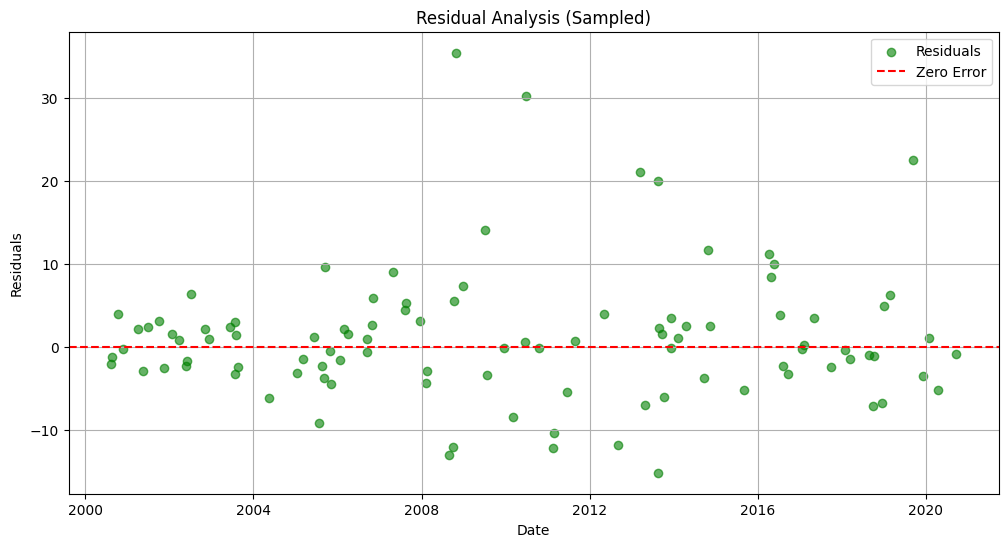

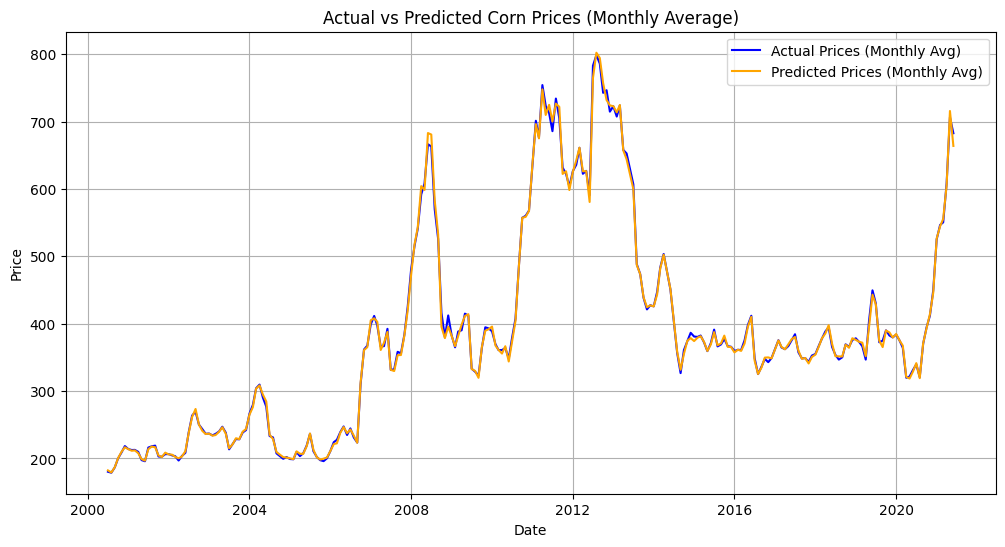

In [22]:
# Fix cluttered visualizations

import matplotlib.pyplot as plt

# Sample the data for better clarity (e.g., 100 points)
sample_indices = np.linspace(0, len(y_test) - 1, 100, dtype=int)
sample_dates = X_test.index[sample_indices]
sample_actual = y_test.iloc[sample_indices]
sample_predicted = y_pred[sample_indices]

# Plot: Actual vs Predicted Prices (Smoothed)
plt.figure(figsize=(12, 6))
plt.plot(sample_dates, sample_actual, label='Actual Prices', color='blue')
plt.plot(sample_dates, sample_predicted, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Corn Prices (Sampled)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Residual Analysis: Scatter Plot
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(sample_dates, sample_actual - sample_predicted, color='green', alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Residual Analysis (Sampled)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

# Aggregated Data for Trend Representation (Monthly Mean)
X_test['Actual'] = y_test
X_test['Predicted'] = y_pred
X_test['Date'] = X_test.index
X_test['Month'] = X_test['Date'].dt.to_period('M')

monthly_data = X_test.groupby('Month').mean()

# Plot: Monthly Aggregated Prices
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index.to_timestamp(), monthly_data['Actual'], label='Actual Prices (Monthly Avg)', color='blue')
plt.plot(monthly_data.index.to_timestamp(), monthly_data['Predicted'], label='Predicted Prices (Monthly Avg)', color='orange')
plt.title('Actual vs Predicted Corn Prices (Monthly Average)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


Step 1: Data Preparation and Splitting
We'll clean the data, process it, and split it into training and testing datasets.

Dataset Overview:
         Date    Open    High     Low   Close  Adj Close   Volume
0  2000-07-17  182.25  182.25  178.25  179.25     179.25  19385.0
1  2000-07-18  179.00  183.25  179.00  180.75     180.75  25205.0
2  2000-07-19  180.00  182.75  178.75  182.00     182.00  17126.0
3  2000-07-20  181.50  187.00  181.00  186.00     186.00  18742.0
4  2000-07-21  185.50  188.00  185.00  187.75     187.75  16814.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323 entries, 0 to 5322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5323 non-null   object 
 1   Open       5190 non-null   float64
 2   High       5190 non-null   float64
 3   Low        5190 non-null   float64
 4   Close      5190 non-null   float64
 5   Adj Close  5190 non-null   float64
 6   Volume     5190 non-null   float64
dtypes: float64(6), object(1)
memory usage: 291.2+ KB

Training set size: 4151
Testing set size: 1038


<ipython-input-28-0719c13d79ed>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_data['Date'] = pd.to_datetime(corn_data['Date'])
<ipython-input-28-0719c13d79ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_data['Target'] = corn_data['Close'].shift(-1)
<ipython-input-28-0719c13d79ed>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

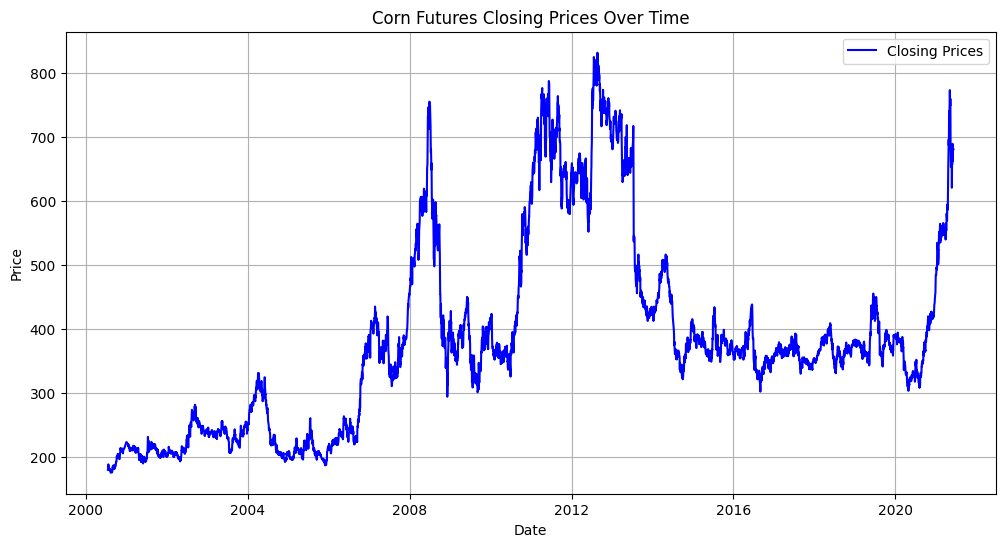

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Corn.csv"  # Replace with your file path in Colab
corn_data = pd.read_csv(file_path)

# Display basic dataset information
print("Dataset Overview:")
print(corn_data.head())

print("\nDataset Info:")
corn_data.info()

# Drop missing values
corn_data = corn_data.dropna()

# Convert 'Date' column to datetime format and set it as index
corn_data['Date'] = pd.to_datetime(corn_data['Date'])
corn_data.set_index('Date', inplace=True)

# Add a target variable: Shift 'Close' to predict the next day's closing price
corn_data['Target'] = corn_data['Close'].shift(-1)

# Drop rows with NaN in the target column
corn_data.dropna(inplace=True)

# Select features and target variable
X = corn_data.drop(columns=['Target'])
y = corn_data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm dataset shapes
print("\nTraining set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Visualize the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(corn_data.index, corn_data['Close'], label='Closing Prices', color='blue')
plt.title('Corn Futures Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


Step 2: Model Design and Training
We'll design a Random Forest model, train it, and evaluate its performance.

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Evaluate the model
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Calculate training and testing errors
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"Training MAE: {train_mae:.2f}")
print(f"Testing MAE: {test_mae:.2f}")


Training MAE: 3.47
Testing MAE: 5.39


Step 3: Prediction, Visualization, and Evaluation
We'll visualize predictions and residuals to understand the model's performance.

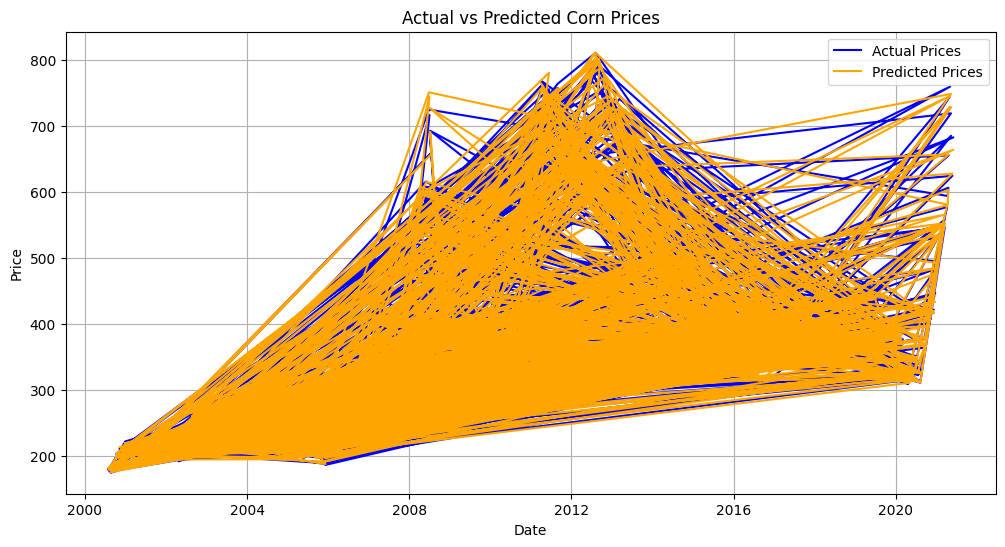

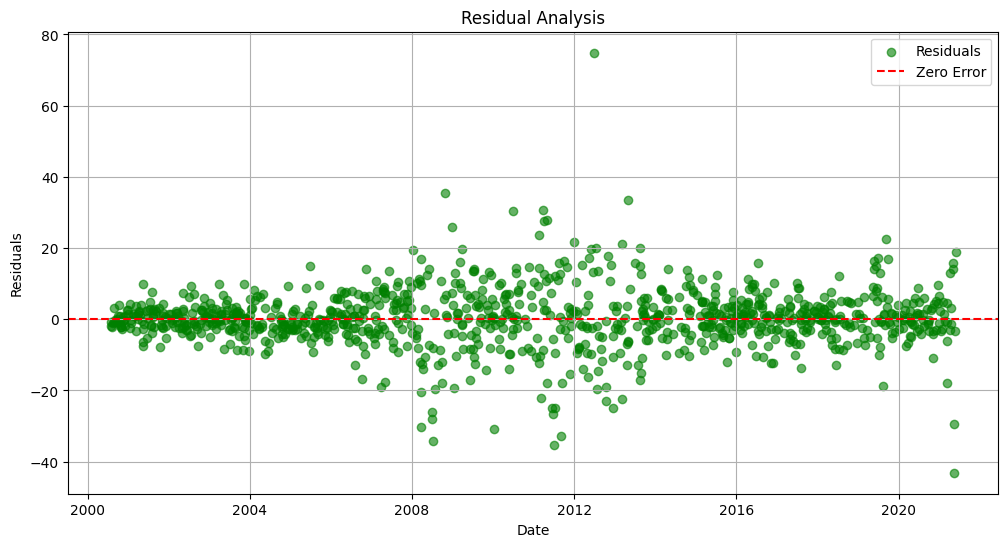

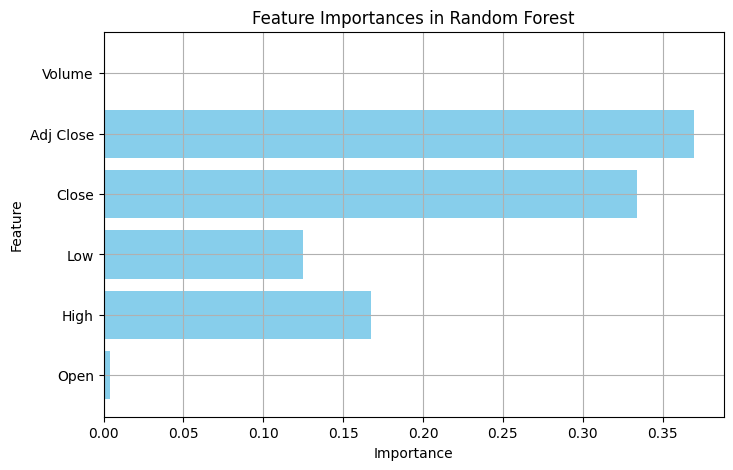

In [30]:
# Plot actual vs predicted prices for test data
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred_test, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Corn Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Residual analysis
residuals = y_test - y_pred_test

plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, residuals, label='Residuals', color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Residual Analysis')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

# Display feature importances
importances = rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.grid()
plt.show()


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define the model
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, scoring='neg_mean_absolute_error', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("MAE with Best Parameters:", mean_absolute_error(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
63 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 497}
MAE with Best Parameters: 5.22555248966178


     mean_test_score                                             params
0                NaN  {'max_depth': 10, 'max_features': 'auto', 'min...
1                NaN  {'max_depth': 10, 'max_features': 'auto', 'min...
2                NaN  {'max_depth': 10, 'max_features': 'auto', 'min...
3                NaN  {'max_depth': 10, 'max_features': 'auto', 'min...
4                NaN  {'max_depth': 10, 'max_features': 'auto', 'min...
..               ...                                                ...
103        -5.626977  {'max_depth': None, 'max_features': 'log2', 'm...
104        -5.611657  {'max_depth': None, 'max_features': 'log2', 'm...
105        -5.576833  {'max_depth': None, 'max_features': 'log2', 'm...
106        -5.571118  {'max_depth': None, 'max_features': 'log2', 'm...
107        -5.562570  {'max_depth': None, 'max_features': 'log2', 'm...

[108 rows x 2 columns]


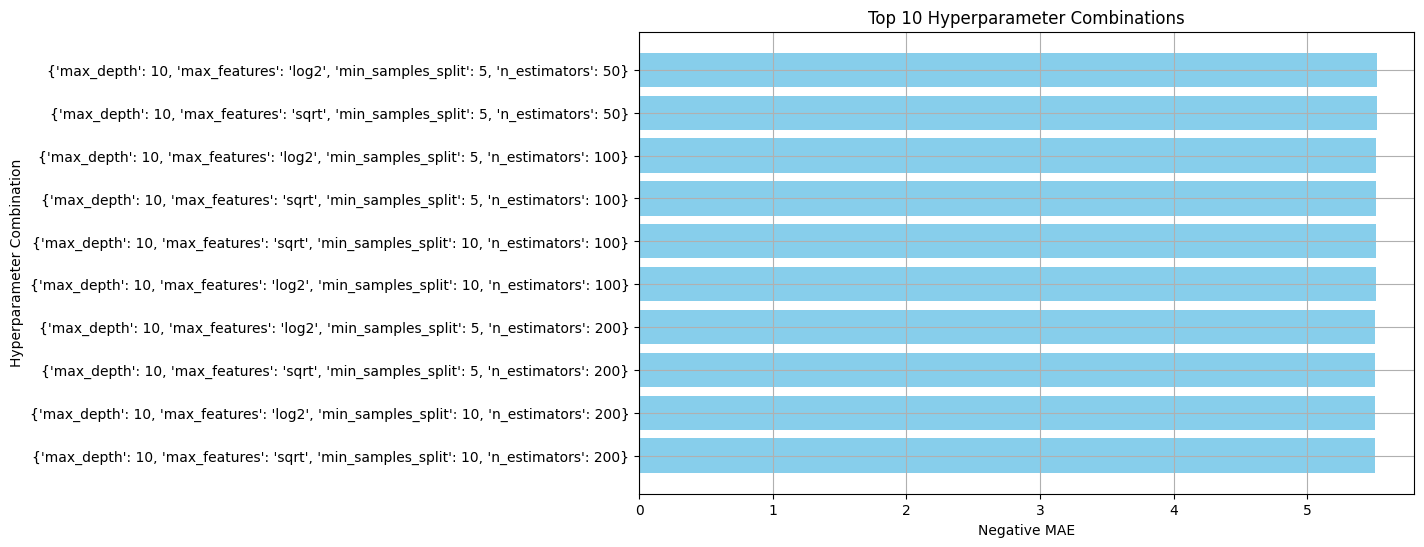

In [32]:
# Extract results into a DataFrame (for Grid Search)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['mean_test_score', 'params']])

# Visualize the top-performing combinations
results['neg_mae'] = -results['mean_test_score']
sorted_results = results.sort_values('neg_mae').head(10)

plt.figure(figsize=(10, 6))
plt.barh(sorted_results['params'].astype(str), sorted_results['neg_mae'], color='skyblue')
plt.xlabel('Negative MAE')
plt.ylabel('Hyperparameter Combination')
plt.title('Top 10 Hyperparameter Combinations')
plt.grid()
plt.show()


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Retrained Model MAE: 5.25
Retrained Model RMSE: 7.95
Retrained Model R-squared: 1.00


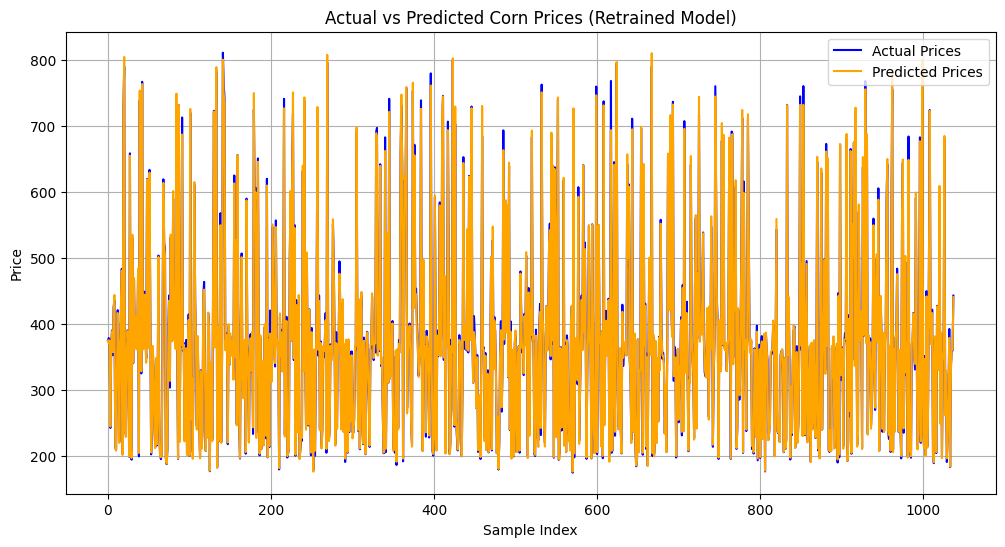

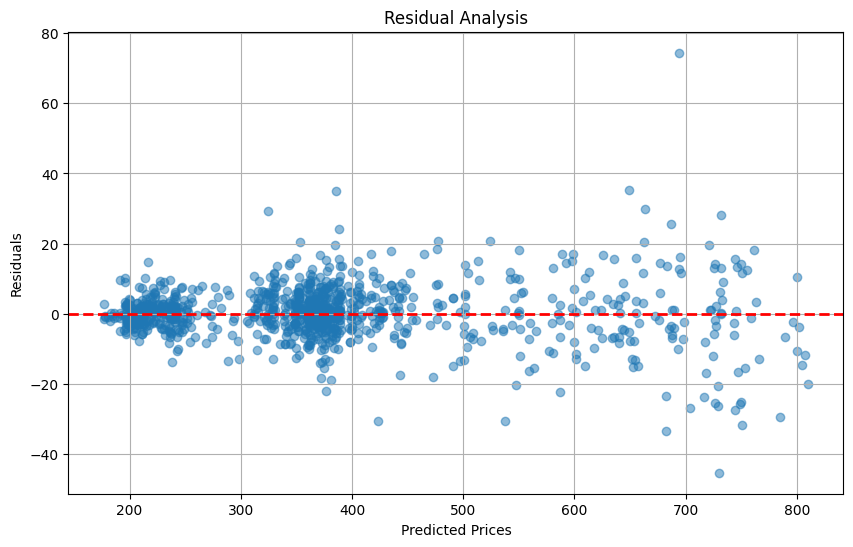

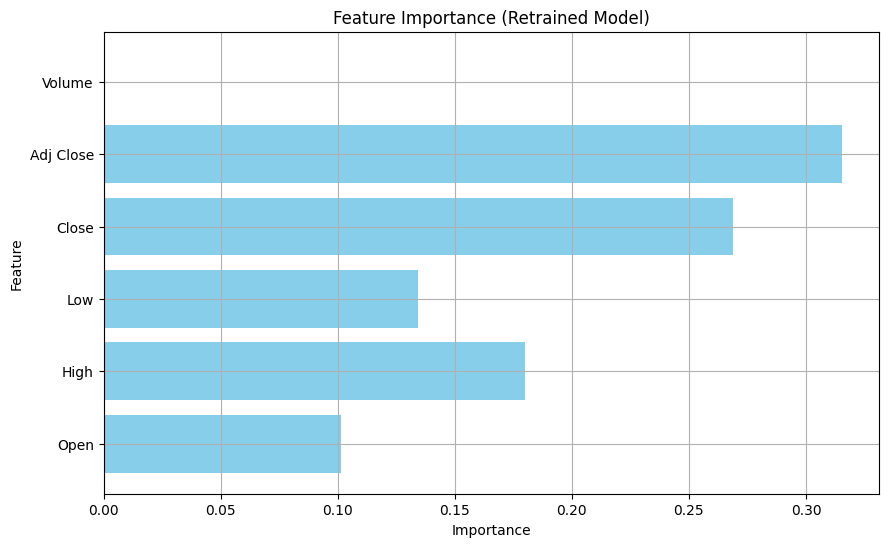

In [33]:
# Extract the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrain the Random Forest with the best parameters
best_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params.get('min_samples_leaf', 1),  # Default to 1 if not provided
    max_features=best_params['max_features'],
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)

# Evaluate the retrained model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_best)

print(f"Retrained Model MAE: {mae:.2f}")
print(f"Retrained Model RMSE: {rmse:.2f}")
print(f"Retrained Model R-squared: {r2:.2f}")
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred_best, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Corn Prices (Retrained Model)")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
residuals = y_test - y_pred_best

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Residual Analysis")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.grid()
plt.show()
importances = best_rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.title("Feature Importance (Retrained Model)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid()
plt.show()
